# Modelo de predição de preço.
## Gabriel Pelacio , Vinicius Meira.
###Nesse caderno tentamos criar um modelo de predição de preço dos combustiveis,utilizando o dataset disponibilizado pelo portal brasileiro de dados abertos "Série Histórica de Preços de Combustíveis"
### Link do dataset:https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda
09/05/2022

In [ ]:
import os
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score

#Classificadores
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.utils.extmath import density
from sklearn import metrics
from time import time
from datetime import date

#Media Movel
from pandas.plotting import register_matplotlib_converters

###Montando o drive no colab e Posicionando os diretorios


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd
%cd drive
%cd My Drive
%pwd

/content/drive
/content/drive/My Drive


'/content/drive/My Drive'

In [ ]:
%pwd

'/content/drive/My Drive'

In [ ]:
arquivo1 = os.path.join('/content/drive/MyDrive/Colab Notebooks/dados/precos-gasolina-etanol-01.csv')
anp1 = pd.read_csv(arquivo1, delimiter=';')
anp1.head(5)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,03/01/2022,"6,99",NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,03/01/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,03/01/2022,"7,05",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO ACAUAN LTDA,00.524.999/0001-78,RODOVIA AC 40,1800,NaN,VILA ACRE,69902-450,GASOLINA,03/01/2022,"6,99",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO ACAUAN LTDA,00.524.999/0001-78,RODOVIA AC 40,1800,NaN,VILA ACRE,69902-450,ETANOL,03/01/2022,"6,12",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
arquivo2 = os.path.join('/content/drive/MyDrive/Colab Notebooks/dados/precos-gasolina-etanol-02.csv')
anp2 = pd.read_csv(arquivo2, delimiter=';')
anp2.head(5)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/02/2022,"7,6",NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,02/02/2022,"7,56",NaN,R$ / litro,IPIRANGA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,02/02/2022,"7,59",NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,02/02/2022,"6,58",NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/02/2022,"7,6",NaN,R$ / litro,BRANCA


In [ ]:
arquivo3 = os.path.join('/content/drive/MyDrive/Colab Notebooks/dados/precos-gasolina-etanol-03.csv')
anp3 = pd.read_csv(arquivo3, delimiter=';')
anp3.head(5)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA,01/03/2022,"6,98",NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,ETANOL,01/03/2022,"6,17",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA ADITIVADA,01/03/2022,"6,98",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO ISAURAO LTDA,04.594.586/0001-10,RUA ISAURA PARENTE,1412,NaN,ESTACAO EXPERIMENTAL,69918-216,GASOLINA,01/03/2022,"6,85",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO ISAURAO LTDA,04.594.586/0001-10,RUA ISAURA PARENTE,1412,NaN,ESTACAO EXPERIMENTAL,69918-216,ETANOL,01/03/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
arquivo4 = os.path.join('/content/drive/MyDrive/Colab Notebooks/dados/precos-gasolina-etanol-04.csv')
anp4 = pd.read_csv(arquivo4, delimiter=';')
anp4.head(5)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,S,PR,CASCAVEL,AUTO POSTO ESPELHO D'ÁGUA LTDA,03.820.930/0001-80,AVENIDA BRASIL,5101,NaN,CENTRO,85812-001,GASOLINA,01/04/2022,"7,21",NaN,R$ / litro,BRANCA
1,S,PR,CASCAVEL,AUTO POSTO ESPELHO D'ÁGUA LTDA,03.820.930/0001-80,AVENIDA BRASIL,5101,NaN,CENTRO,85812-001,ETANOL,01/04/2022,"5,11",NaN,R$ / litro,BRANCA
2,S,PR,CASCAVEL,AUTO POSTO ESPELHO D'ÁGUA LTDA,03.820.930/0001-80,AVENIDA BRASIL,5101,NaN,CENTRO,85812-001,GASOLINA ADITIVADA,01/04/2022,"7,23",NaN,R$ / litro,BRANCA
3,S,PR,CASCAVEL,BW COMÉRCIO DE COMBUSTÍVEIS LTDA.,07.658.656/0001-45,AVENIDA BRASIL,5699,NaN,CENTRO,85800-000,GASOLINA,01/04/2022,"7,29",NaN,R$ / litro,BRANCA
4,S,PR,CASCAVEL,BW COMÉRCIO DE COMBUSTÍVEIS LTDA.,07.658.656/0001-45,AVENIDA BRASIL,5699,NaN,CENTRO,85800-000,ETANOL,01/04/2022,"5,19",NaN,R$ / litro,BRANCA


In [ ]:
arquivo5 = os.path.join('/content/drive/MyDrive/Colab Notebooks/dados/precos-gasolina-etanol-05.csv')
anp5 = pd.read_csv(arquivo5, delimiter=';')
anp5.head(5)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,S,PR,PATO BRANCO,SANTOS & MERLO LTDA.,79.854.667/0001-01,RUA TOCANTINS,2535,NaN,CENTRO,85501-010,GASOLINA,04/05/2022,"7,27",NaN,R$ / litro,RODOIL
1,S,PR,PATO BRANCO,SANTOS & MERLO LTDA.,79.854.667/0001-01,RUA TOCANTINS,2535,NaN,CENTRO,85501-010,GASOLINA ADITIVADA,04/05/2022,"7,38",NaN,R$ / litro,RODOIL
2,S,PR,PATO BRANCO,SANTOS & MERLO LTDA.,79.854.667/0001-01,RUA TOCANTINS,2535,NaN,CENTRO,85501-010,ETANOL,04/05/2022,6,NaN,R$ / litro,RODOIL
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,04/05/2022,"7,77",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,04/05/2022,"7,77",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
anp=pd.concat([anp1,anp2,anp3,anp4,anp5])

In [ ]:
anp.head(500000)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,03/01/2022,"6,99",NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,03/01/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,03/01/2022,"7,05",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO ACAUAN LTDA,00.524.999/0001-78,RODOVIA AC 40,1800,NaN,VILA ACRE,69902-450,GASOLINA,03/01/2022,"6,99",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO ACAUAN LTDA,00.524.999/0001-78,RODOVIA AC 40,1800,NaN,VILA ACRE,69902-450,ETANOL,03/01/2022,"6,12",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30454,N,RO,ARIQUEMES,",D. E. COMÉRCIO DE COMBUSTÍVEIS LTDA",05.147.841/0001-40,AVENIDA CANÃA,2987,NaN,SETOR 03,78930-000,GASOLINA,18/05/2022,"7,37",NaN,R$ / litro,IPIRANGA
30455,N,RO,ARIQUEMES,CAMPOS & LUNA LTDA,03.071.296/0001-20,AVENIDA TABAPUA,2255,NaN,SETOR 03,78930-000,GASOLINA ADITIVADA,18/05/2022,"7,37",NaN,R$ / litro,ATEM' S
30456,N,RO,ARIQUEMES,CAMPOS & LUNA LTDA,03.071.296/0001-20,AVENIDA TABAPUA,2255,NaN,SETOR 03,78930-000,GASOLINA,18/05/2022,"7,37",NaN,R$ / litro,ATEM' S
30457,N,RO,ARIQUEMES,CAMPOS & LUNA LTDA,03.071.296/0001-20,AVENIDA TABAPUA,2255,NaN,SETOR 03,78930-000,ETANOL,18/05/2022,"6,79",NaN,R$ / litro,ATEM' S


In [ ]:
anp.dtypes

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

In [ ]:
len(anp)

251364

In [ ]:
anp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 251364 entries, 0 to 30458
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     251364 non-null  object 
 1   Estado - Sigla     251364 non-null  object 
 2   Municipio          251364 non-null  object 
 3   Revenda            251364 non-null  object 
 4   CNPJ da Revenda    251364 non-null  object 
 5   Nome da Rua        251364 non-null  object 
 6   Numero Rua         251255 non-null  object 
 7   Complemento        52731 non-null   object 
 8   Bairro             250652 non-null  object 
 9   Cep                251364 non-null  object 
 10  Produto            251364 non-null  object 
 11  Data da Coleta     251364 non-null  object 
 12  Valor de Venda     251364 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  251364 non-null  object 
 15  Bandeira           251364 non-null  object 
dtypes: 

In [ ]:
anp.isna().sum()

Regiao - Sigla            0
Estado - Sigla            0
Municipio                 0
Revenda                   0
CNPJ da Revenda           0
Nome da Rua               0
Numero Rua              109
Complemento          198633
Bairro                  712
Cep                       0
Produto                   0
Data da Coleta            0
Valor de Venda            0
Valor de Compra      251364
Unidade de Medida         0
Bandeira                  0
dtype: int64

###Removendo as colunas categóricas que não vamos utilizar

In [ ]:
anp.drop(['Revenda','Cep','CNPJ da Revenda','Bairro','Numero Rua','Nome da Rua','Complemento','Valor de Compra','Unidade de Medida'], axis = 'columns', inplace = True)

In [ ]:
anp

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Bandeira
0,N,AC,RIO BRANCO,GASOLINA,03/01/2022,"6,99",VIBRA ENERGIA
1,N,AC,RIO BRANCO,ETANOL,03/01/2022,"5,99",VIBRA ENERGIA
2,N,AC,RIO BRANCO,GASOLINA ADITIVADA,03/01/2022,"7,05",VIBRA ENERGIA
3,N,AC,RIO BRANCO,GASOLINA,03/01/2022,"6,99",VIBRA ENERGIA
4,N,AC,RIO BRANCO,ETANOL,03/01/2022,"6,12",VIBRA ENERGIA
...,...,...,...,...,...,...,...
30454,N,RO,ARIQUEMES,GASOLINA,18/05/2022,"7,37",IPIRANGA
30455,N,RO,ARIQUEMES,GASOLINA ADITIVADA,18/05/2022,"7,37",ATEM' S
30456,N,RO,ARIQUEMES,GASOLINA,18/05/2022,"7,37",ATEM' S
30457,N,RO,ARIQUEMES,ETANOL,18/05/2022,"6,79",ATEM' S


###Tentativa de alterar o Tipo de dados de "Valor de Venda" para numérico
####O erro permanece mas altera o tipo de dado

In [ ]:
anp['Valor de Venda'] = anp['Valor de Venda'].str.replace(',', '.').astype(float)
anp['Valor de Venda'] = anp['Valor de Venda'].astype('float64')

In [ ]:
anp.dtypes

Regiao - Sigla     object
Estado - Sigla     object
Municipio          object
Produto            object
Data da Coleta     object
Valor de Venda    float64
Bandeira           object
dtype: object

###Mostrando no eixo y numero de preços repetidos e no eixo x os preços praticados pelos postos

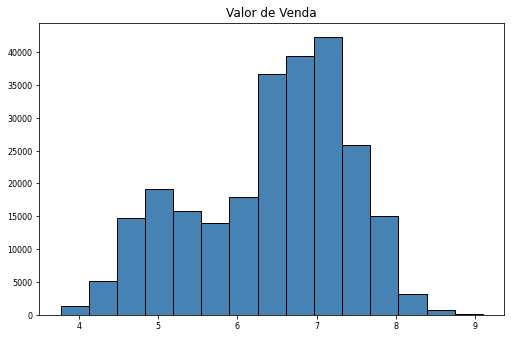

In [ ]:
anp.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

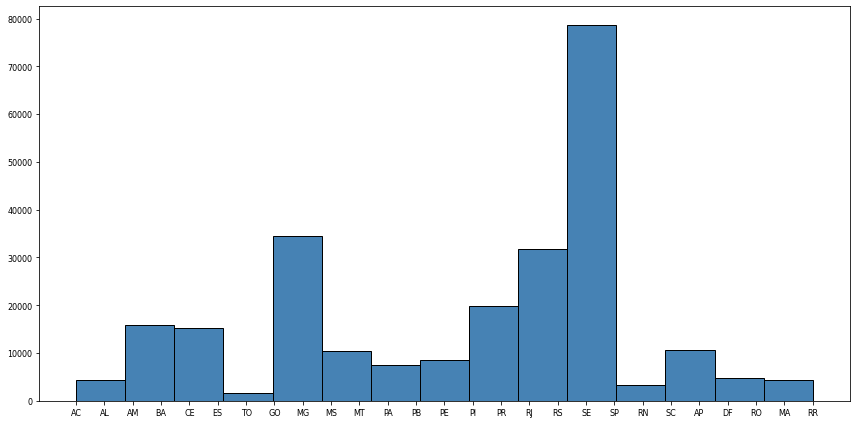

In [ ]:
anp['Estado - Sigla'].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 1.5)) 

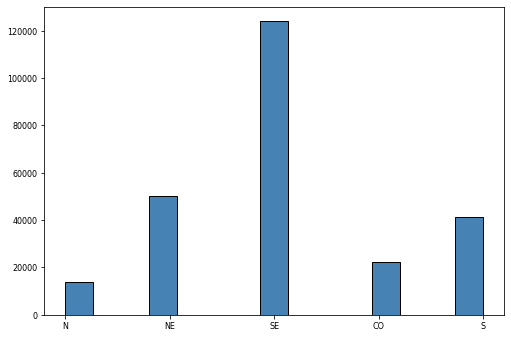

In [ ]:
anp['Regiao - Sigla'].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

In [ ]:
Minimum_price  =  np . min (anp['Valor de Venda'])
maximum_price  =  np . max (anp['Valor de Venda']) 
preço_média  =  np . mean (anp['Valor de Venda'])
median_price  =  np . median (anp['Valor de Venda']) 
std_price  =  np . std (anp['Valor de Venda']) 

print  ("Estatística dos valores no dataset: \n ") 
print  ("Preço mínimo: ${:,.2f}" . format ( Minimum_price )) 
print  ("Preço máximo: ${:,.2f}" . format ( maximum_price )) 
print  ("Preço médio: ${:,.2f}" . format ( preço_média ))
print  ("Preço mediano ${:,.2f}" . format ( median_price )) 
print  ("Desvio padrão de preços: ${:,.2f}" . format ( std_price)) 

Estatística dos valores no dataset: 
 
Preço mínimo: $3.77
Preço máximo: $9.10
Preço médio: $6.43
Preço mediano $6.64
Desvio padrão de preços: $0.98


In [ ]:
anp.value_counts('Produto')

Produto
GASOLINA              95367
ETANOL                84129
GASOLINA ADITIVADA    71868
dtype: int64

In [ ]:
anp.value_counts('Estado - Sigla')

Estado - Sigla
SP    76497
MG    25071
RJ    17064
PR    16547
RS    14683
BA    13419
SC    10062
CE     9963
GO     9465
PE     8570
MT     6755
ES     5237
PA     4613
MA     3871
MS     3620
RN     3308
PI     3197
PB     2915
AL     2639
DF     2603
AM     2548
RO     2257
SE     2114
AC     1717
TO     1592
AP      542
RR      495
dtype: int64

Text(0, 0.5, '')

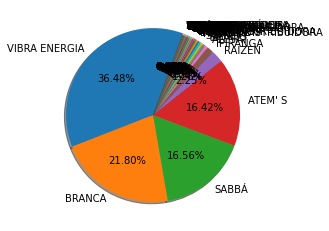

In [ ]:
classificacao_grupo = anp.groupby('Bandeira')
labels = list(anp.Bandeira.drop_duplicates())
fig = anp.Bandeira.value_counts().plot.pie(labels=labels, autopct='%.2f%%', shadow=True, startangle=70)
fig.set_ylabel('')


In [ ]:
anp.drop(['Regiao - Sigla','Municipio'], axis = 'columns', inplace = True)

### Transforma a variável alvo de float para 5 Categorias

In [ ]:
#anp['Valor de Venda'] = np.where(anp['Valor de Venda'].between(4.20,5.16), 1, anp['Valor de Venda'])
#anp['Valor de Venda'] = np.where(anp['Valor de Venda'].between(5.17,6.12), 2, anp['Valor de Venda'])
#anp['Valor de Venda'] = np.where(anp['Valor de Venda'].between(6.13,7.09), 3, anp['Valor de Venda'])
#anp['Valor de Venda'] = np.where(anp['Valor de Venda'].between(7.10,8.05), 4, anp['Valor de Venda'])
#anp['Valor de Venda'] = np.where(anp['Valor de Venda'].between(8.06,9.01), 5, anp['Valor de Venda'])

In [ ]:
#anp['Valor de Venda'] = anp['Valor de Venda'].astype('int')

In [ ]:
anp['Valor de Venda'].head()

0    6.99
1    5.99
2    7.05
3    6.99
4    6.12
Name: Valor de Venda, dtype: float64

In [ ]:
anp.head()

,Estado - Sigla,Produto,Data da Coleta,Valor de Venda,Bandeira
0,AC,GASOLINA,03/01/2022,6.99,VIBRA ENERGIA
1,AC,ETANOL,03/01/2022,5.99,VIBRA ENERGIA
2,AC,GASOLINA ADITIVADA,03/01/2022,7.05,VIBRA ENERGIA
3,AC,GASOLINA,03/01/2022,6.99,VIBRA ENERGIA
4,AC,ETANOL,03/01/2022,6.12,VIBRA ENERGIA


In [ ]:
anp['Data da Coleta']=pd.to_datetime(anp['Data da Coleta'])

In [ ]:
anp['Data da Coleta']

0       2022-03-01
1       2022-03-01
2       2022-03-01
3       2022-03-01
4       2022-03-01
           ...    
30454   2022-05-18
30455   2022-05-18
30456   2022-05-18
30457   2022-05-18
30458   2022-05-19
Name: Data da Coleta, Length: 251364, dtype: datetime64[ns]

In [ ]:
anp['Data da Coleta'] = anp['Data da Coleta'].dt.strftime('%-m')

In [ ]:
anp['Data da Coleta'] = anp['Data da Coleta'].astype('int')

In [ ]:
anp.head(20)

,Estado - Sigla,Produto,Data da Coleta,Valor de Venda,Bandeira
0,AC,GASOLINA,3,6.990,VIBRA ENERGIA
1,AC,ETANOL,3,5.990,VIBRA ENERGIA
2,AC,GASOLINA ADITIVADA,3,7.050,VIBRA ENERGIA
3,AC,GASOLINA,3,6.990,VIBRA ENERGIA
4,AC,ETANOL,3,6.120,VIBRA ENERGIA
5,AC,GASOLINA ADITIVADA,3,7.050,VIBRA ENERGIA
6,AC,GASOLINA,3,6.980,BRANCA
7,AC,GASOLINA ADITIVADA,3,7.080,BRANCA
8,AC,GASOLINA,3,6.989,SABBÁ
9,AC,GASOLINA ADITIVADA,3,7.139,SABBÁ


In [ ]:
mediaMovel= anp.rolling(2).mean()
print(mediaMovel)

       Data da Coleta  Valor de Venda
0                 NaN             NaN
1                 3.0           6.490
2                 3.0           6.520
3                 3.0           7.020
4                 3.0           6.555
...               ...             ...
30454             5.0           7.485
30455             5.0           7.370
30456             5.0           7.370
30457             5.0           7.080
30458             5.0           7.215

[251364 rows x 2 columns]


In [ ]:
def moving_avg(period):
    plt.figure(figsize=(13,7))
    anp['Valor de Venda'].rolling(window=period).mean().plot(label=f'Média de {period} Meses')
    anp['Valor de Venda'].plot(label='Flutuação do Preço')
    plt.legend()
    plt.show()

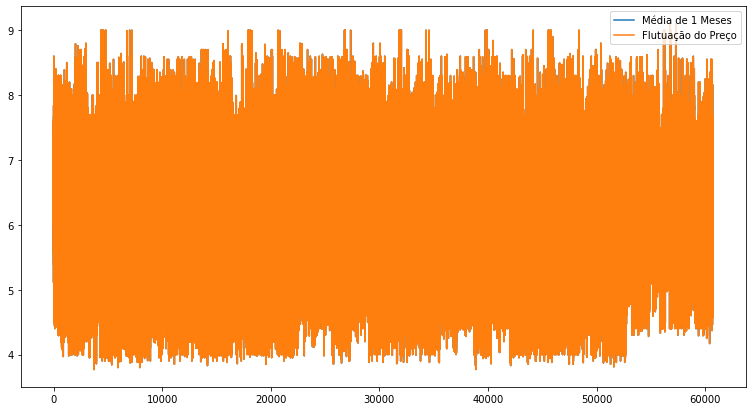

In [ ]:
moving_avg(1)

In [ ]:
anp['Valor de Venda'].std()

0.9794459210944212

###Divisão aleatória da Base de dados em 70% para Treino e 30% para o Teste

In [ ]:
from sklearn.model_selection import train_test_split

X = anp.drop(['Valor de Venda'], axis = "columns")
y = anp['Valor de Venda']

column_names_train = anp.drop(['Valor de Venda'], axis = "columns").columns
column_name_target = anp[['Valor de Venda']].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [ ]:
#y_train.replace(['BARATO', 'ACESSIVEL', 'MODERADO', 'ELEVADO', 'CARO'], [1, 2, 3, 4, 5], inplace=True)
#y_test.replace(['BARATO', 'ACESSIVEL', 'MODERADO', 'ELEVADO', 'CARO'], [1, 2, 3, 4, 5], inplace=True)

In [ ]:
y_train.value_counts()

6.999    4607
6.499    3536
6.699    3395
6.899    3287
6.799    3183
         ... 
4.575       1
7.833       1
4.871       1
5.976       1
4.296       1
Name: Valor de Venda, Length: 2373, dtype: int64

In [ ]:
y_test.value_counts()

6.999    1945
6.499    1483
6.699    1427
6.799    1359
6.899    1349
         ... 
8.280       1
7.435       1
3.857       1
5.604       1
6.153       1
Name: Valor de Venda, Length: 1980, dtype: int64

###Transformando as Colunas Objeto em Colunas numérica utilizando o OneHotEncoder

In [ ]:
encoder_transformer = make_column_transformer(
    (OneHotEncoder(), ['Estado - Sigla','Produto','Bandeira']),
    remainder = 'passthrough'
)
encoder_transformer.fit(X_train)
encoder_transformer.transform(X_train)

<175954x79 sparse matrix of type '<class 'numpy.float64'>'
	with 703816 stored elements in Compressed Sparse Row format>

### Utilizando o Imputer para preencher as colunas automaticamente

In [ ]:
from sklearn.compose import make_column_selector

encoder_imputer_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'), make_column_selector(dtype_exclude = np.number)),
    (SimpleImputer(missing_values=np.nan, strategy = 'mean'), make_column_selector(dtype_include = np.number)),
    remainder = 'passthrough'
)

encoder_imputer_transformer.fit(X_train)

X_train_encoded_imputed = encoder_imputer_transformer.fit_transform(X_train)

In [ ]:
X_test_encoded_imputed = encoder_imputer_transformer.fit_transform(X_test)

### Nomear as colunas do Dataframe

In [ ]:
new_categorical_column_names = list(encoder_imputer_transformer.named_transformers_['onehotencoder'].get_feature_names_out(['Estado - Sigla','Produto','Bandeira']))
new_numeric_column_names     = list(X_train._get_numeric_data().columns)

print(new_categorical_column_names + new_numeric_column_names)



['Estado - Sigla_AC', 'Estado - Sigla_AL', 'Estado - Sigla_AM', 'Estado - Sigla_AP', 'Estado - Sigla_BA', 'Estado - Sigla_CE', 'Estado - Sigla_DF', 'Estado - Sigla_ES', 'Estado - Sigla_GO', 'Estado - Sigla_MA', 'Estado - Sigla_MG', 'Estado - Sigla_MS', 'Estado - Sigla_MT', 'Estado - Sigla_PA', 'Estado - Sigla_PB', 'Estado - Sigla_PE', 'Estado - Sigla_PI', 'Estado - Sigla_PR', 'Estado - Sigla_RJ', 'Estado - Sigla_RN', 'Estado - Sigla_RO', 'Estado - Sigla_RR', 'Estado - Sigla_RS', 'Estado - Sigla_SC', 'Estado - Sigla_SE', 'Estado - Sigla_SP', 'Estado - Sigla_TO', 'Produto_ETANOL', 'Produto_GASOLINA', 'Produto_GASOLINA ADITIVADA', 'Bandeira_ALESAT', 'Bandeira_AMERICANOIL', "Bandeira_ATEM' S", 'Bandeira_ATLÂNTICA', 'Bandeira_BRANCA', 'Bandeira_CHARRUA', 'Bandeira_CIAPETRO', 'Bandeira_DIBRAPE', 'Bandeira_DISLUB', 'Bandeira_EQUADOR', 'Bandeira_FAN', 'Bandeira_FEDERAL ENERGIA', 'Bandeira_IDAZA', 'Bandeira_IPIRANGA', 'Bandeira_LARCO', 'Bandeira_MASUT DISTRIBUIDORA', 'Bandeira_MAXSUL', 'Bandeir

In [ ]:
X_train_encoded_imputed = pd.DataFrame.sparse.from_spmatrix(X_train_encoded_imputed,columns = new_categorical_column_names + new_numeric_column_names)
X_train_encoded_imputed.sparse.to_dense()

,Estado - Sigla_AC,Estado - Sigla_AL,Estado - Sigla_AM,Estado - Sigla_AP,Estado - Sigla_BA,Estado - Sigla_CE,Estado - Sigla_DF,Estado - Sigla_ES,Estado - Sigla_GO,Estado - Sigla_MA,...,Bandeira_TDC DISTRIBUIDORA,Bandeira_TEMAPE,Bandeira_TOBRAS,Bandeira_TORRAO,Bandeira_TOTALENERGIES,Bandeira_UNI,Bandeira_VIBRA ENERGIA,Bandeira_WALENDOWSKY,Bandeira_WATT,Data da Coleta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0
175950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
175951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
175952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


In [ ]:
X_test_encoded_imputed = pd.DataFrame.sparse.from_spmatrix(X_test_encoded_imputed,columns = new_categorical_column_names + new_numeric_column_names)
X_test_encoded_imputed.sparse.to_dense()

,Estado - Sigla_AC,Estado - Sigla_AL,Estado - Sigla_AM,Estado - Sigla_AP,Estado - Sigla_BA,Estado - Sigla_CE,Estado - Sigla_DF,Estado - Sigla_ES,Estado - Sigla_GO,Estado - Sigla_MA,...,Bandeira_TDC DISTRIBUIDORA,Bandeira_TEMAPE,Bandeira_TOBRAS,Bandeira_TORRAO,Bandeira_TOTALENERGIES,Bandeira_UNI,Bandeira_VIBRA ENERGIA,Bandeira_WALENDOWSKY,Bandeira_WATT,Data da Coleta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
75406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
75407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
75408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
X_train=X_train_encoded_imputed
X_test=X_test_encoded_imputed

### Cria a função benchmark que ira treinar e medir a acurácia de todos os modelos

In [ ]:
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

### Chama a função a cima e aplica os resuldados da função

In [ ]:
results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="auto"), "Ridge Classifier"),
        (Perceptron(), "Perceptron"),
        (PassiveAggressiveClassifier(), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))
    print('Abaixo da Média | Normal | Acima da Média')
    print()

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())

    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3, max_iter=5000)))
    print('Abaixo da Média | Normal | Acima da Média')
    print()

    results.append(benchmark(SGDClassifier(alpha=.0001, 
                                           penalty=penalty)))
    print('Abaixo da Média | Normal | Acima da Média')
    print()

print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=5000,
                                       penalty="elasticnet")))
print('Abaixo da Média | Normal | Acima da Média')
print()

print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))
print('Abaixo da Média | Normal | Acima da Média')
print()

print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
print('Abaixo da Média | Normal | Acima da Média')
print()

results.append(benchmark(BernoulliNB(alpha=.01)))
print('Abaixo da Média | Normal | Acima da Média')

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(tol=0.01)


ValueError: ignored

### Apresentando os Classificadores em ordem decrescente.





In [ ]:
df = pd.DataFrame(results, index=None).rename(columns={0: 'Classificador', 1: 'Acurácia'})
df.drop(df.columns[[2, 3]], axis=1, inplace=True)
df.sort_values('Acurácia', ascending=False, ignore_index=True)

IndexError: ignored